In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.datasets import fetch_california_housing

In [38]:
df = fetch_california_housing(return_X_y=False)

# Splitting the dataset into input and output columns

In [44]:
X = df.data
Y = df.target

# Splitting the dataset into training and testing sets

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=2, test_size=0.2)

X_train.shape, X_test.shape

((16512, 8), (4128, 8))

# Applying Linear Regression Model

In [55]:
reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [57]:
y_pred = reg.predict(X_test)

# Calculating r2_score and RMSE

In [60]:
print("R2_score: ", r2_score(y_test, y_pred))
print("R2_score: ", np.sqrt(mean_squared_error(y_test, y_pred)))

R2_score:  0.6013853272055165
R2_score:  0.7327644142619772


# Applying Ridge Regression on Linear Regression

In [97]:
R1 = Ridge(alpha=0.1)

R1.fit(X_train, y_train)

Ridge(alpha=0.1)

In [99]:
y_pred_ridge = R1.predict(X_test)

In [101]:
print("R2_score: ", r2_score(y_test, y_pred_ridge))
print("R2_score: ", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))

R2_score:  0.6013847065910114
R2_score:  0.7327649846926192


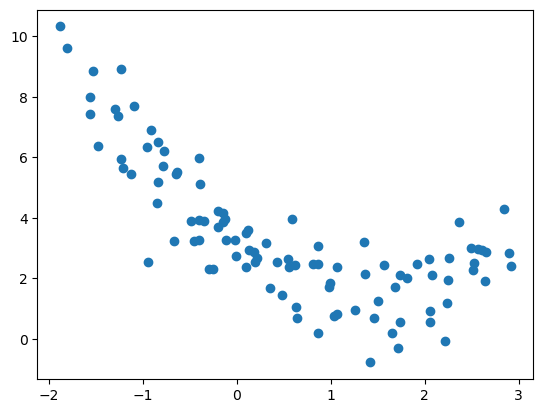

In [113]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1,x2)
plt.show()

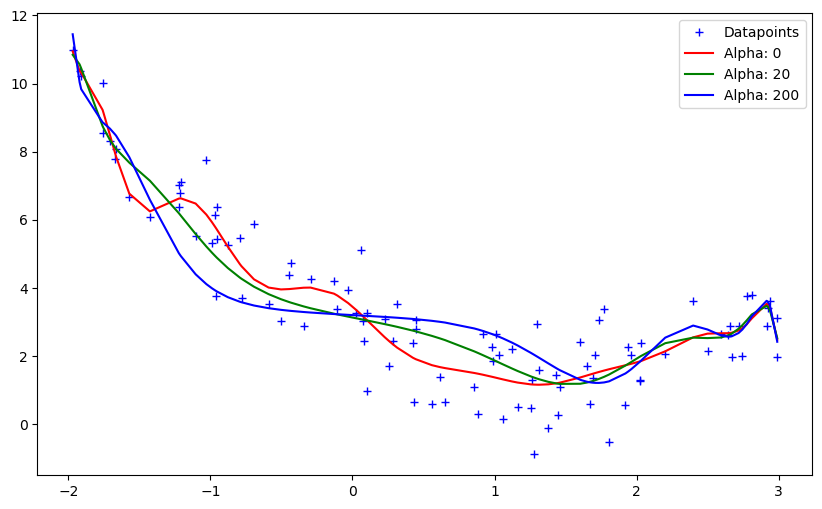

In [107]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()